C:\Users\wajiz.pk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Centers (Centroids):
[[0.45945946 0.28494624]
 [0.86486486 0.8655914 ]
 [0.09459459 0.14516129]]


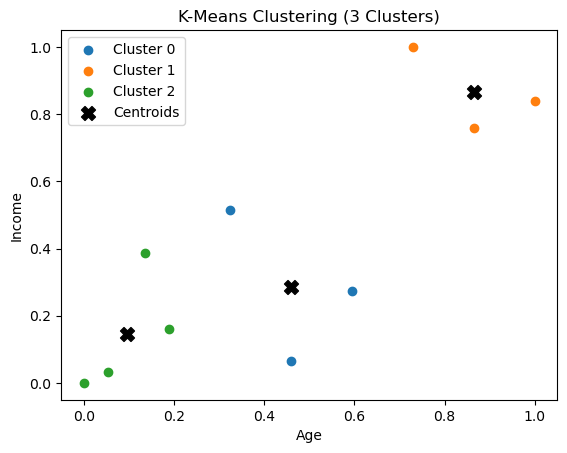

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
df = pd.read_csv("income.csv")
scaler = MinMaxScaler()
df[['Age', 'Income($)']] = scaler.fit_transform(df[['Age', 'Income($)']])
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'Income($)']])
centroids = kmeans.cluster_centers_
print("Cluster Centers (Centroids):")
print(centroids)
for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Income($)'], label=f'Cluster {cluster}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=100, label='Centroids')
plt.title('K-Means Clustering (3 Clusters)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

In [2]:
import numpy as np
data = np.array([
    [1, 4, 1],
    [1, 2, 2],
    [1, 4, 2],
    [2, 1, 2],
    [1, 1, 1],
    [2, 4, 2],
    [1, 1, 2],
    [2, 1, 1]
])
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(data)
centroids = kmeans.cluster_centers_
print("Cluster Assignments:")
print(clusters)
print("Cluster Centers (Centroids):")
print(centroids)

Cluster Assignments:
[1 0 1 0 0 1 0 0]
Cluster Centers (Centroids):
[[1.4        1.2        1.6       ]
 [1.33333333 4.         1.66666667]]


C:\Users\wajiz.pk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
df = pd.read_excel('Online_Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

In [5]:
basket = (df[df['Country'] =="France"]
.groupby(['InvoiceNo', 'Description'])['Quantity']
.sum().unstack().reset_index().fillna(0)
.set_index('InvoiceNo'))

In [11]:
def encode_units(x):
    if x <= 0:
        return 0 
    if x >= 1:
        return 1
    basket_sets = basket.applymap(encode_units)
    basket_sets.drop('POSTAGE', inplace=True, axis=1)
    basket_sets

In [14]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=len(frequent_itemsets))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,1.0,0.064088,3.283859,0.964734,0.591837,0.695480,0.744079
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,1.0,0.064088,3.791383,0.959283,0.591837,0.736244,0.744079
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,1.0,0.069932,4.916181,0.979224,0.704545,0.796590,0.826814
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,1.0,0.069932,5.568878,0.976465,0.704545,0.820431,0.826814
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.094388,0.073980,0.725000,7.681081,1.0,0.064348,3.293135,0.968652,0.604167,0.696338,0.754392


In [16]:
rules[ (rules['lift'] >= 6) &
(rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,1.0,0.069932,4.916181,0.979224,0.704545,0.796590,0.826814
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,1.0,0.069932,5.568878,0.976465,0.704545,0.820431,0.826814
17,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,1.0,0.085121,4.336735,0.956140,0.645161,0.769412,0.784615
18,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,1.0,0.104878,21.556122,0.981725,0.857143,0.953609,0.924444
19,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,1.0,0.104878,7.852041,0.993343,0.857143,0.872645,0.924444
20,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,1.0,0.085433,34.489796,0.956294,0.709091,0.971006,0.848611
21,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,1.0,0.086474,34.897959,0.967949,0.764706,0.971345,0.877500
22,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.122449,0.132653,0.099490,0.812500,6.125000,1.0,0.083247,4.625850,0.953488,0.639344,0.783824,0.781250


In [18]:
frequent_itemsets_5 = apriori(basket_sets, min_support=0.05, use_colnames=True)
rules_5 = association_rules(frequent_itemsets_5, metric="lift", min_threshold=1, num_itemsets=len(frequent_itemsets))
rules_5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,1.0,0.064088,3.283859,0.964734,0.591837,0.695480,0.744079
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,1.0,0.064088,3.791383,0.959283,0.591837,0.736244,0.744079
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,1.0,0.069932,4.916181,0.979224,0.704545,0.796590,0.826814
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,1.0,0.069932,5.568878,0.976465,0.704545,0.820431,0.826814
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.094388,0.073980,0.725000,7.681081,1.0,0.064348,3.293135,0.968652,0.604167,0.696338,0.754392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,1.0,0.086474,34.897959,0.967949,0.764706,0.971345,0.877500
82,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.122449,0.132653,0.099490,0.812500,6.125000,1.0,0.083247,4.625850,0.953488,0.639344,0.783824,0.781250
83,(SET/20 RED RETROSPOT PAPER NAPKINS),"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",0.132653,0.122449,0.099490,0.750000,6.125000,1.0,0.083247,3.510204,0.964706,0.639344,0.715116,0.781250
84,(SET/6 RED SPOTTY PAPER PLATES),"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",0.127551,0.102041,0.099490,0.780000,7.644000,1.0,0.086474,4.081633,0.996251,0.764706,0.755000,0.877500


C:\Users\wajiz.pk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


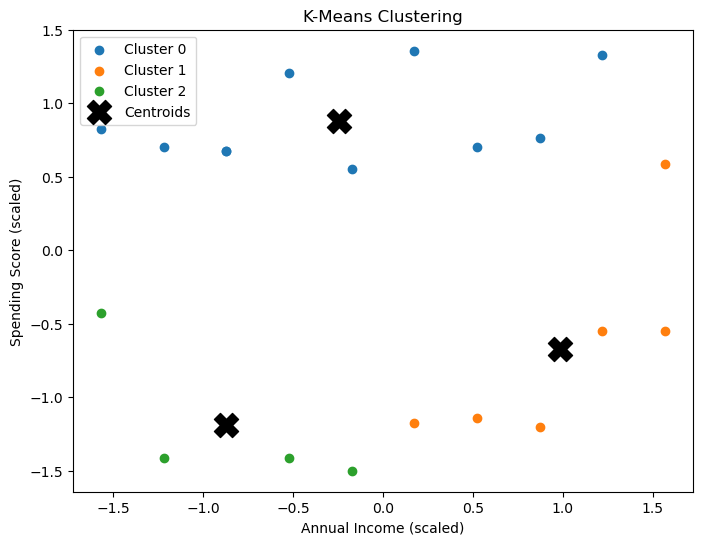

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(8, 6))
for cluster in range(3):
    plt.scatter(X_scaled[data['Cluster'] == cluster, 0], 
                X_scaled[data['Cluster'] == cluster, 1], 
                label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=300, c='black', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

In [22]:
from mlxtend.frequent_patterns import apriori, association_rules
data = pd.read_csv('Groceries.csv')  
basket = (data.groupby(['TransactionID', 'Item'])['Item']
          .count().unstack().reset_index().fillna(0)
          .set_index('TransactionID'))
basket_sets = basket.applymap(lambda x: 1 if x >= 1 else 0)
basket_sets = basket_sets.astype(bool)
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=len(frequent_itemsets))
rules

C:\Users\wajiz.pk\AppData\Local\Temp\ipykernel_2728\3628561315.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(lambda x: 1 if x >= 1 else 0)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Butter),(Bread),0.35,0.55,0.30,0.857143,1.558442,1.0,0.1075,3.150000,0.551282,0.500000,0.682540,0.701299
1,(Bread),(Butter),0.55,0.35,0.30,0.545455,1.558442,1.0,0.1075,1.430000,0.796296,0.500000,0.300699,0.701299
2,(Eggs),(Milk),0.50,0.50,0.25,0.500000,1.000000,1.0,0.0000,1.000000,0.000000,0.333333,0.000000,0.500000
3,(Milk),(Eggs),0.50,0.50,0.25,0.500000,1.000000,1.0,0.0000,1.000000,0.000000,0.333333,0.000000,0.500000
4,"(Eggs, Butter)",(Bread),0.10,0.55,0.10,1.000000,1.818182,1.0,0.0450,inf,0.500000,0.181818,1.000000,0.590909
5,"(Eggs, Bread)",(Butter),0.25,0.35,0.10,0.400000,1.142857,1.0,0.0125,1.083333,0.166667,0.200000,0.076923,0.342857
6,(Butter),"(Eggs, Bread)",0.35,0.25,0.10,0.285714,1.142857,1.0,0.0125,1.050000,0.192308,0.200000,0.047619,0.342857
7,(Bread),"(Eggs, Butter)",0.55,0.10,0.10,0.181818,1.818182,1.0,0.0450,1.100000,1.000000,0.181818,0.090909,0.590909
8,"(Butter, Milk)",(Bread),0.10,0.55,0.10,1.000000,1.818182,1.0,0.0450,inf,0.500000,0.181818,1.000000,0.590909
9,"(Milk, Bread)",(Butter),0.20,0.35,0.10,0.500000,1.428571,1.0,0.0300,1.300000,0.375000,0.222222,0.230769,0.392857
